<a href="https://colab.research.google.com/github/dsunsyc/AIProjects/blob/master/LinearRegressionIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
Linear Regression is a powerful tool that finds a relationship between data points in the form of a best fitting curve. Using the relationship output by the learning algorithm, we are able to predict and estimate values for data that has never been encountered before. 

This notebook is aimed to provide an introduction to Linear Regression. As such, it's not required to have previous knowledge of any ML algorithms, but having some experience with multivariable calculus and linear algebra would be useful!

# Environment Setup

We'll need to import some libraries to allow us to easily implement linear regression with gradient descent from scratch. 

1. First we'll need Numpy, as it'll allow us to perform matrix multiplication and other linear algebra operation. 
2. Pyplot from MatPlotLib will allow us to visualize and plot graphs about our model.
3. We'll use Pandas to read our data from a csv file stored on a github repo.
4. Seaborn will be used on top of pyplot to create some more visually aesthetic plots. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

URL = "https://raw.githubusercontent.com/dsunsyc/AIProjects/master/Abalone/abalone.data.csv"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **1.0 Introduction**

## 1.1 Intuition
Say you live right next to an ice cream shop. It seems like more people buy ice cream when the day is hot. You decide to record the peak temperature of the day, along with the number of customers you see going into the ice cream shop and end up with the following data. 

Temp ($^{\circ}$C) | Num. Customers 
-- | --
15 | 3
35 | 9
25 | 6
20 | 5
30 | 5


From a glance it seems obvious that a relationship exists between the day's heat and the number of customers, but it's hard to come up with a detailed idea of their correlation. 

Plotting the dataset, for low enough dimensions, is an easy way to check for a relationship.

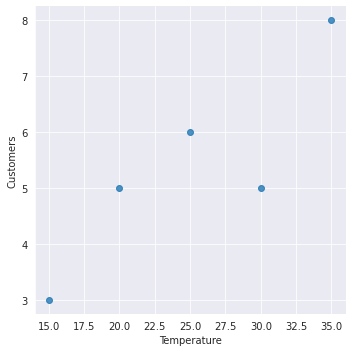

In [2]:
temps = [15, 35, 25, 20, 30]
customers = [3, 8, 6, 5, 5]
sns.set_style("darkgrid")
df = pd.DataFrame({"Temperature": temps, "Customers": customers})
ax = sns.lmplot(x="Temperature", y="Customers", data=df, fit_reg=False)
plt.show()

As such, it's pretty obvious that a linear relationship does exist between the heat of day and number of customers. If we use Seaborn's built in function for fitting and plotting a regression line, we can find a well fitting line for prediction purposes. 


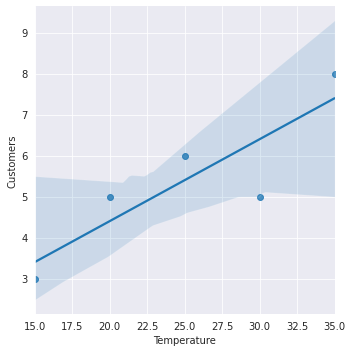

In [3]:
ax = sns.lmplot(x="Temperature", y="Customers", data=df)
plt.show()

The line of best fit that lmplot found allows us now to predict the amount of frozen dairy consumers given a certain temperature. For example, if the peak temperature was 32.5 $^{\circ}$C, we would estimate seeing around 7 ice cream shop customers! 

But how do we actually find the best model for our data? We use Linear Regression.

## 1.2 Evaluation and Cost Function
Linear Regression, like many other learning algorithms, aims to minimize a cost function over a dataset by tweaking certain parameters (more on that in section 1.4). Intuitively, a good model would have as little deviation as possible to the given data. For instance, even though we observed only 5 customers when the temperature was 30 $^{\circ}$C, our model from above would predict to see ~6 people instead. 

We can represent the **cost** of a single training example to be $(predictVal - trueVal)^2$, with the square to account for negative values of $predictVal - trueVal$. We take the average cost of each point in the dataset and that output would be our cost function!

### Mathematically:

### $J(\theta) = \frac{1}{2m}*$$\sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2$,

where 
*   $J(\theta)$ represents the cost function
*   $\theta$ represents the parameters of our model
*   $m$ is the number of points we have in our dataset (ice cream example would have $m=5$)
*   $h_\theta(x_i)$ represents our model's predicted value of the $i$th point in our dataset 
*   $y_i$ represents the true value of the $i$th point in our dataset



## 1.3 Prediction
The task of prediction is actually quite simple. Going back to the ice cream example, our best fitting line was about $y = .2x + .4$, which would represent our hypothesis ($h_\theta()$). But we have to find a way to represent that equation in our model. In that example, our model only predicted on one variable, the temperature of the day. However, for a more complex dataset, you can predict based on temperature, whether or not a sale is happening, the month of the year, etc. All those features take up their own variables, and thus our input to the model is a vector. We can extract all the variables into a vector called $x_i$ and all the coefficients that represent our model into vector $\theta$. 

$\theta$ in our ice cream example was [.4, .2] which we feed vector [$x_0$, $x_1$] in to predict our value. $x^0$ should just be thought of as the y-intercept variable, and is always 1. So even when our model just predicts on one variable, $x$ is still a vector with the first value being 1. Putting this together, we can represent the model by vector [.4, .2], and when given input [1, $x_1$] calculates the value as a dot product of the two vectors, $.4*1 + .2*x^1$. Dot product of vector [$v_1, v_2, ..., v_n$] and [$u_1, u_2, ..., u_n$] is the sum of all pair products: $v_1*u_1 + v_2*u_2 + ... + v_n*u_n$.

The code below represents predicting on our ice cream example. You can try out different values of theta, as well as different values of the input to see how it affects the prediction. 

In [4]:
input = 17.5
theta = np.array([.4, .2])
x = np.array([1, input])

pred = x.dot(theta)
print("The predicted number of customers given temp " + str(input) + " is: " + str(pred))

The predicted number of customers given temp 17.5 is: 3.9


## 1.4 Learning


Now that we have a well defined cost function, we can have our model learn to fit the data. As stated above, the objective of our learning is to minimize the cost of our parameters on the given data. 

We use gradient descent to iteratively have our values of $\theta$ converge to their optimal values. As hinted by the name, gradient descent is a process where we aim to reach the minimum cost value for our parameter $\theta$ based on the gradient (also known as the slope) of the cost function. 

![alt text](http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)
Image source: http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/

Following our graph from above, if our $\theta_0$ was initialized to the rightmost side of the graph, we notice that the slope at that point is steeply positive (positive slope of large magnitute). Since we're trying to arrive at a minimum, we update $\theta_0$ to go in the direction opposite to the slope. 

## Mathematically:

while not converged:
> for j = 1:n:
>> $temp_j = \theta_j - \alpha*\frac{\delta}{\delta\theta_j}J(\theta)$

> for j = 1:n:
>> $\theta_j = temp_j$



*   $n$ represents the total number of weights in $\theta$ 
*   $\alpha$ represents the learning rate, a constant that dictates how large a step taken per iteration would be
*   $\frac{\delta}{\delta\theta_j}J(\theta)$ represents the partial derivative of the cost function with respect to $\theta_j$



### Let's try to apply what we learned on a real dataset.

# 2.0 Applying to a Real Example

Scientists have been researching a type of shellfish called abalone and have accumulated a large set of measurements (including sex, length, diameter) for the individuals they have found. Abalone, like trees, require a meticulous and time consuming process of counting rings on their shells to determine their age. The scientists speculate that there is a relationship to be found among those physical traits and the age of the abalone. Let's try and find said relation.

## 2.1 Loading the Dataset and Preprocessing


First, we have to obtain the dataset that we'd be working with. The raw data is stored in the URL defined in setup. It's always a good idea to shuffle the dataset before you split it or train with it.

In [5]:
df = pd.read_csv(URL)
df = df.sample(frac=1).reset_index(drop=True).to_numpy() #4176x9
df

array([['I', 0.48, 0.37, ..., 0.114, 0.15, 8],
       ['M', 0.57, 0.475, ..., 0.1905, 0.305, 18],
       ['F', 0.535, 0.42, ..., 0.1565, 0.2035, 8],
       ...,
       ['M', 0.625, 0.5, ..., 0.2185, 0.37, 17],
       ['I', 0.435, 0.32, ..., 0.0635, 0.105, 9],
       ['M', 0.6, 0.465, ..., 0.2205, 0.251, 9]], dtype=object)

Now we have our numpy array containing all the data from the abalone. 
Each row represents a different abalone, and the columns represent different measurements:

0. Sex | 1. Length (mm) | 2. Diameter (mm) | 3. Height (mm) | 4. Whole weight (g) | 5. Schucked Weight (g) | 6. Viscera Weight (g) | 7. Shell Weight (g) | 8. Rings (Num Rings Correlates to Age)
-- | -- | -- | -- | -- | -- | -- | -- | -- 


We want to have all values in the array be numerical, so we map all the sexes to integer values.

In [6]:
sex_to_int = {'F':0, 'M':1, 'I':2}
convert = lambda x: sex_to_int[x]
sex_col = df[:,0]
vfunc = np.vectorize(convert)
df[:,0] = vfunc(sex_col)
df[0:5,:]

array([[2, 0.48, 0.37, 0.12, 0.536, 0.251, 0.114, 0.15, 8],
       [1, 0.57, 0.475, 0.195, 1.0295, 0.4635, 0.1905, 0.305, 18],
       [0, 0.535, 0.42, 0.13, 0.6990000000000001, 0.3125, 0.1565, 0.2035,
        8],
       [1, 0.645, 0.515, 0.185, 1.4605, 0.5835, 0.3155, 0.41, 19],
       [1, 0.59, 0.49, 0.165, 1.207, 0.5589999999999999, 0.235, 0.309,
        10]], dtype=object)

Next, we split up our data into 2 sets, training and test. We train our model on the training set, and then measure performance on the test set. A generally accepted ratio of training : test data is 7 : 3. 

We'll also cast all the data in the matrix to be type np.float64. For y_train and y_test, it's important to reshape the data into a vector of shape (m, 1), which is done by the reshape() function, in order to properly do matrix operations. The -1 in the argument means that the function will infer what size that will be.

In [7]:
train = df[:2923, :8].astype(np.float64)
test = df[2923:, :8].astype(np.float64)
y_train = df[:2923, 8].astype(np.float64).reshape((-1,1))
y_test = df[2923:, 8].astype(np.float64).reshape((-1,1))

## 2.2 $\theta$ Initialization

We initialize $\theta$ to be a vector of zeros. In order to be able to dot product theta with each example in our dataset, it has to be size (num features,1).
We'll pass in n (num features) as a parameter to the function.

In [8]:
def init_theta(n):
  return np.zeros((n+1, 1))

## 2.3 Normalization

An optimization technique to speed up the learning process is to use feature normalization. This centers all the training data at the origin as well as scaling it based on its standard deviation. 

**It's important to save the means and standard deviations of each feature, as when we try to predict using our model later on, we'd have to normalize those vectors as well.**

In [9]:
def feature_normalize(X):
    mean_arr = X.mean(axis=0)
    std_arr = X.std(axis=0)
    return ((X-mean_arr)/(std_arr), mean_arr, std_arr)

## 2.4 Cost function

We now implement our cost function, which returns a scalar value of average cost for our predictions on the dataset. It takes in parameters X, values, theta. X is the training set that we use, values are the labels or true values of those examples, and theta are the parameters (weights) for our model.

In [10]:
def cost(X, values, theta):
    m,n = X.shape
    assert(theta.shape == (n,1))
    hypo = X.dot(theta)     #Computes the predicted value by finding the dot product between X and Theta
    diff = (hypo-values)**2 #Computes the square error of each prediction with actual value
    return diff.sum()/(2*m) 

We can now test our cost function, and see it work on our dataset. 

We'll initialize our $\theta$ and compute the cost that it has on our training dataset. 

If everything is set up properly, you should see this output a cost of ~55.

In [11]:
train1, mean, std = feature_normalize(train)
m, n = train1.shape
theta = init_theta(n)
weighted_train =  np.insert(train1, 0, 1, axis=1) #We're adding in the x0, the 1 in front of each training example
cost(weighted_train, y_train, theta)

54.5838179952104

## 2.5 Gradient descent/Learning

Gradient descent is the actual learning part of the algorithm. 
It takes in parameters X: our mxn matrix of examples, values: our mx1 array of true values, theta: the parameters for our model, iters: the number of iterations to run gradient descent for, alpha: the learning rate. It outputs a list of costs for each iteration. While gradient descent runs, it'll update (mutate) the parameter theta to achieve lower and lower costs. 

In [12]:
def gradient_descent(X, values, theta, iters, alpha):
    m,n = X.shape 
    assert(theta.shape == (n, 1))
    history = [None]*iters                     #initialize list of costs
    for iter in range(iters):
        hypo = X.dot(theta)                    #calculates prediction (mx1 matrix)
        diff = hypo - values                   #finds difference (mx1 matrix)
        grad = (alpha/m)*(X.T.dot(diff))       #computes the partial derivative with respect to each thetaj 
        theta -= grad                          #update theta
        history[iter] = cost(X, values, theta) #record cost into history
    return history

Now that we have a working gradient descent algorithm, we can try and learn better values for theta. 

Run the cell below and you should see a final value of hist being ~2.5, which is about a 20x improvement from our initial theta cost!

In [13]:
alpha = .1
iters = 100
# weighted_train.dot(theta).shape
theta = init_theta(n)
weighted_train = np.insert(train1, 0, 1, axis=1)
hist = gradient_descent(weighted_train, y_train, theta, iters, alpha)
hist[-1]

2.5910257728406987

You can adjust the values for alpha (learning rate) and iters (the number of iterations gradient descent runs for). Generally you'll find a smaller alpha will result in smaller steps, and require more iterations to achieve low cost. However, although a larger alpha "learns" faster, it's also prone to overshooting, and can increase the cost/error!

*Tip: Try adjusting alpha by factors of 3. .03 -> .1 -> .3 -> 1 -> 3 -> 10*

## Evaluation

We now have our model's $\theta$ and history. A simple way to check if the model has learned properly is to plot the cost over iterations and see that it has decreased. 

In [14]:
def plot_cost(history):
    iters = list(range(len(hist)))
    df = pd.DataFrame({"Error": list(hist), "Iters": iters})
    ax = sns.lmplot(x="Iters", y="Error", data=df, fit_reg=False)
    plt.show()

If everything has been done correctly, you should see the error (cost) converging to $<$5. If not, try and tweak around with learning rate (alpha) and your number of iterations (iters) in the gradient descent step. 

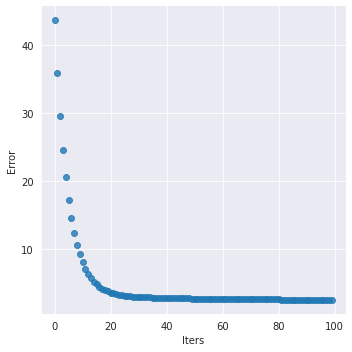

In [15]:
plot_cost(hist)

Now that we have our model, we can use our testing set to validate our results. Since we trained our model on a separate subset of data, it's common to see that the cost for our test set is slightly higher than our training set. 

Since our model performed well on our training set, if we see a large difference in performance on our test set it usually means the model has overfit the training data, and is not generalized enough to fit new data. If our model didn't perform well on training data and test data, it usually means the model has underfit and is too simple to capture the complexity in the data. 

In [16]:
weighted_test = np.insert(test, 0, 1, axis=1) #weighted_test (mxn+1)
cost(weighted_test, y_test, theta)


4.2197473644034655

## Prediction

Prediction is as simple as computing the dot product between $\theta$ and $x$. However, since we normalized our input vector, it's important to normalize any vector we try and predict, or the weights would be off. We also have to add the bias variable (prepending a 1 to the beginning of our input vector). 

In [17]:
def predict(example, theta, use_age, mean, std):
    vector = (example - mean)/std
    vector = np.insert(vector, 0, 1) #prepend one in front of the input vector
    pred = vector.dot(theta) #compute dot product
    return pred + 1.5 if use_age else pred #if we want age then we add 1.5 to result, else return number of rings

Finally we can use our model to estimate the age of our abalone. Let's do some predictions!

We'll use some sample data with some small tweaks. 

In [18]:
ex1 = np.array(['F', .51, .28, .135, .63, .23, .142, .18]) #should predict near 9
ex2 = np.array(['M', .44, .365, .125, .52, .23, .1, .16]) #should predict near 10
ex3 = np.array(['I', .325, .245, .07, .16, .07, .025, .045]) #should predict near 7

ex1[0] = sex_to_int[ex1[0]]
ex2[0] = sex_to_int[ex2[0]]
ex3[0] = sex_to_int[ex3[0]]

ex1 = ex1.astype(np.float64)
ex2 = ex2.astype(np.float64)
ex3 = ex3.astype(np.float64)

pred1 = predict(ex1, theta, True, mean, std)
pred2 = predict(ex2, theta, True, mean, std)
pred3 = predict(ex3, theta, True, mean, std)
 
print("First prediction should be near 9: " + str(pred1))
print("Second prediction should be near 10: " + str(pred2))
print("Third prediction should be near 7: " + str(pred3))

First prediction should be near 9: [11.19161448]
Second prediction should be near 10: [10.67321246]
Third prediction should be near 7: [8.02800277]


As you can see, the predictions aren't quite perfect, but they can get pretty close!

# 3.0 Conclusion

Linear Regression is powerful learning algorithm that finds relationships between data. Given a well constructed set of data, linear regression is able to output a fairly accurate model which can be used to predict values of never-before seen examples. However, Linear Regression isn't all powerful, often struggling to capture complex, non-linear relationships. However, when used on an appropriate dataset, Linear Regression is an incredibly reliable and efficient way to create a model of the data.  

# 4.0 What's Next?

## 4.1 Improving Model Accuracy
Although our final model achieved decently accurate results, there are still ways to improve it. 

* Let gradient descent run for more iterations. However, as you can see with the cost plot, the cost eventually converges to a value where increasing the iterations has a negligible increase to accuracy.
* Increase the number of training examples, so outliers and rare values have less of an impact.  
* Feature engineering, which is trying to add features that capture more complex relationships between data.
* Implement a polynomial linear regression, where instead of having the model output a hyperplane, the model could generate non-linear surfaces as well. This is a type of feature engineering. 

## 4.2 Moving On
If you're learning ML for the first time, I'd recommend spending as much time as needed to solidify your understanding of linear regression. It's a powerful foundation to have, and many other learning algorithms share similar traits/parts. After that, you should explore other supervised learning algorithms, such Logistic Regression, before moving onto neural networks and unsupervised algorithms. Specifically, check out Andrew Ng's course on Machine Learning on Coursera, it's a great resource for beginners and makes things very easy to digest! https://www.coursera.org/learn/machine-learning


If you've made it this far, thank you so much for stepping through this colab notebook of mine! I made it mainly to try and improve my own understanding of this fundamental ML algorithm, and hopefully will have more to come! 